In [1]:
import numpy as np
import pandas as pd 

from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.decomposition import FactorAnalysis



#### To display graphs just below the code(magic function)

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('ticks')

#### Loading dataset and renaming dataset

In [3]:
concrete = pd.read_excel("./Concrete_Data.xls")

concrete.rename(columns=lambda x: x[0:3], inplace=True)
concrete.head()

,Cem,Bla,Fly,Wat,Sup,Coa,Fin,Age,Con
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cem    1030 non-null float64
Bla    1030 non-null float64
Fly    1030 non-null float64
Wat    1030 non-null float64
Sup    1030 non-null float64
Coa    1030 non-null float64
Fin    1030 non-null float64
Age    1030 non-null int64
Con    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
print (concrete.isnull().sum())

Cem    0
Bla    0
Fly    0
Wat    0
Sup    0
Coa    0
Fin    0
Age    0
Con    0
dtype: int64


#### Data Dimensions

In [6]:
concrete.shape

(1030, 9)

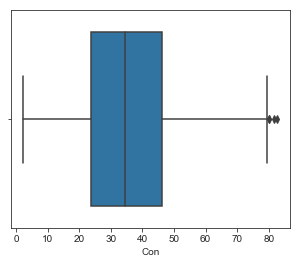

In [7]:
sb.boxplot(concrete.Con)

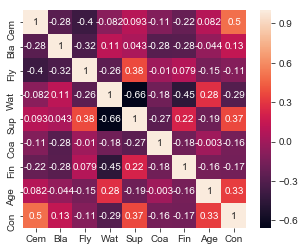

In [8]:
sb.heatmap(concrete.corr(),annot=True);

In [9]:
concrete.Con.describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Con, dtype: float64

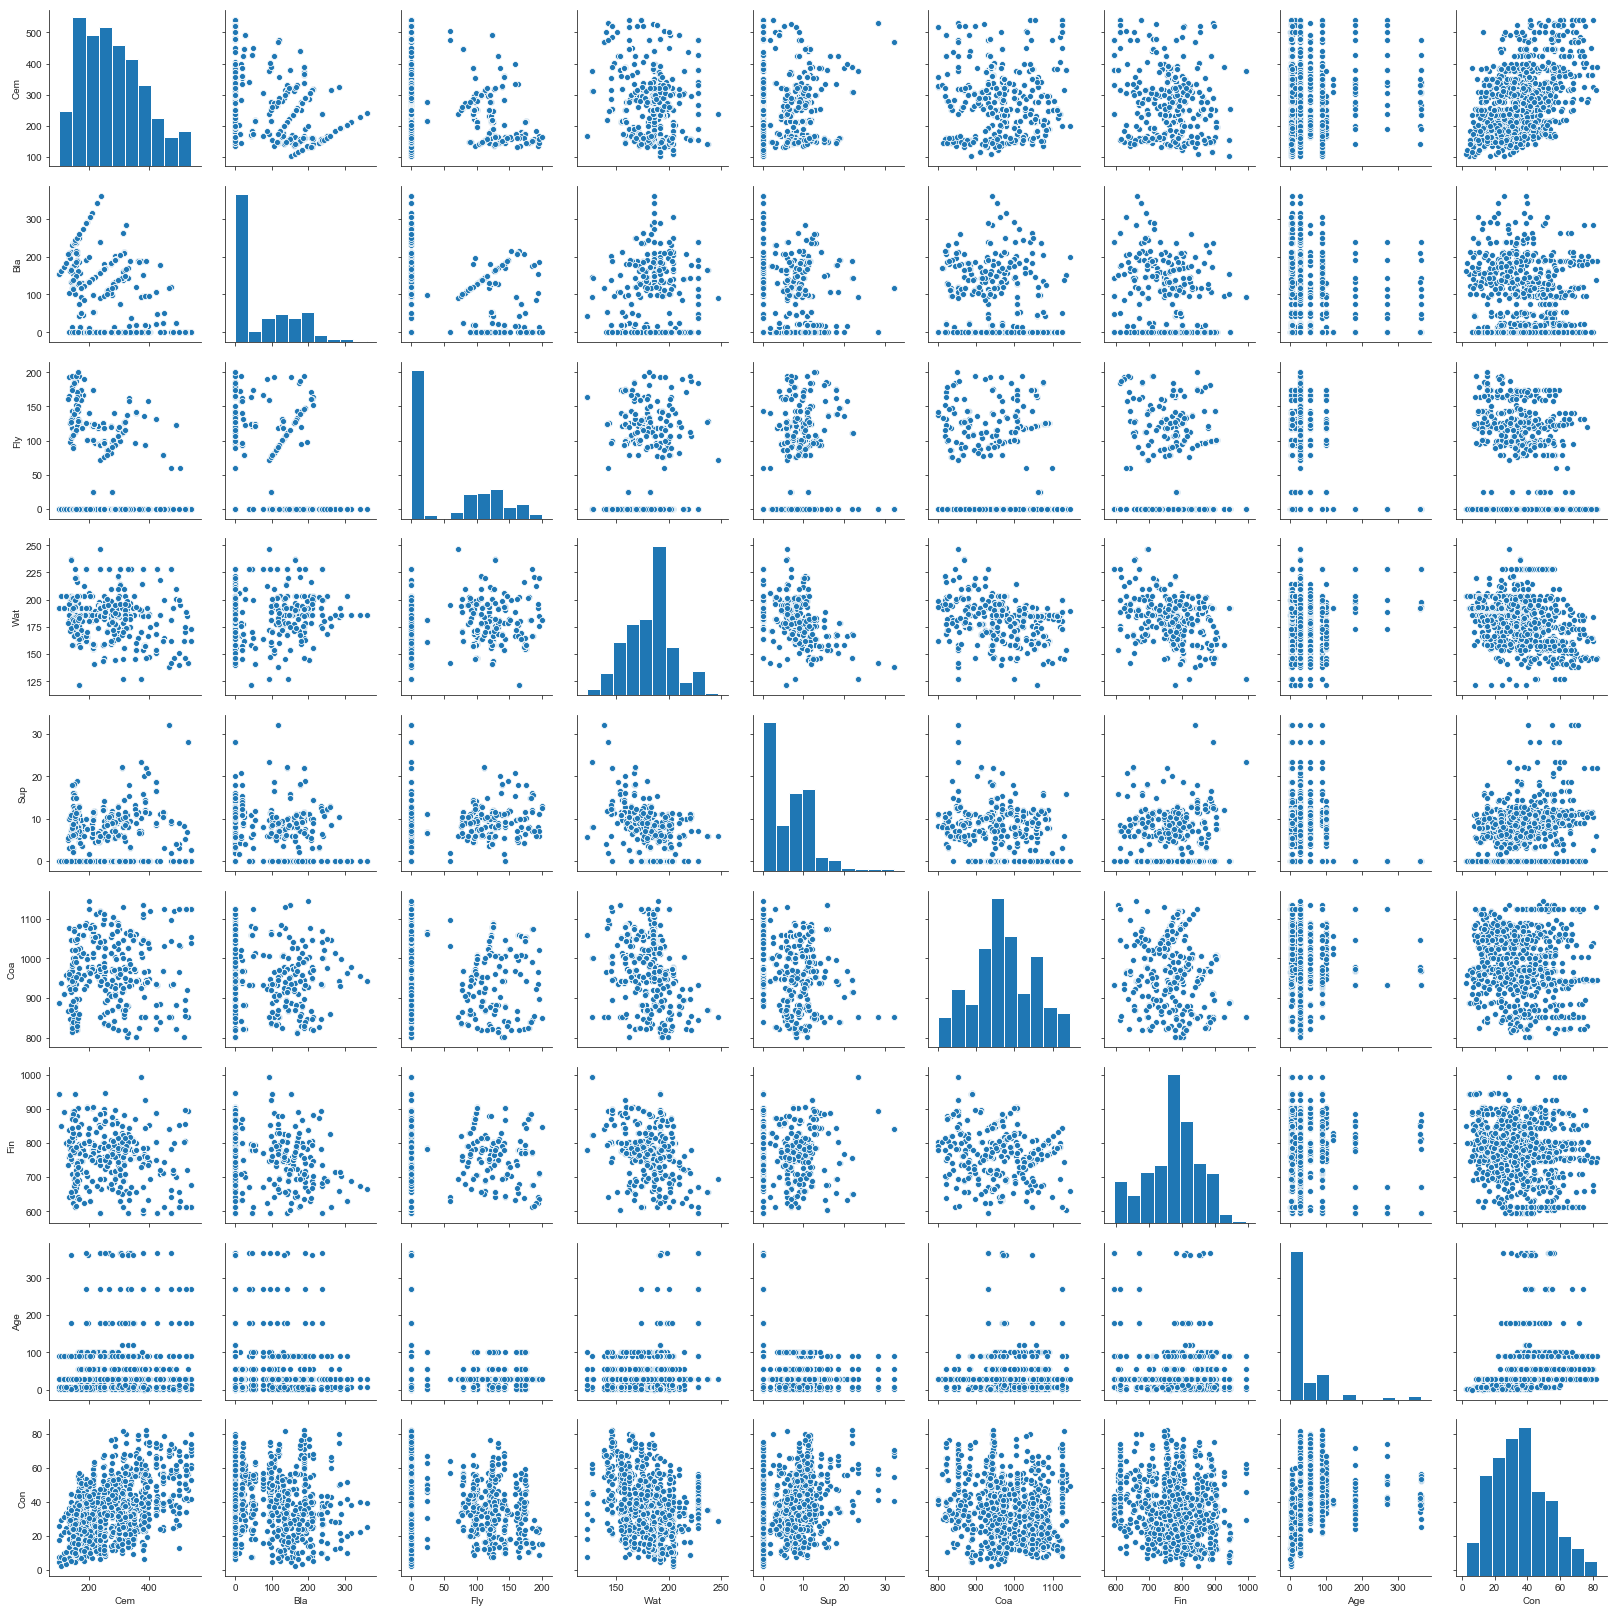

In [10]:
sb.pairplot(concrete);

#### Splitting Train Data and Test Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feed_feature_original = ['Cem','Bla','Fly','Wat','Sup','Coa','Fin','Age']
check_feature = 'Con'

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(concrete[feed_feature_original], concrete[check_feature], random_state = 0)
    

In [14]:
from sklearn import preprocessing


X_train_values = X_train.values
X_train_normalized = preprocessing.normalize(X_train_values, norm='l2')

X_test_values = X_test.values
X_test_normalized = preprocessing.normalize(X_test_values)

X_test_normalized

array([[0.35977713, 0.        , 0.        , ..., 0.80949854, 0.44108676,
        0.00215866],
       [0.09548395, 0.14322593, 0.        , ..., 0.74627018, 0.62313793,
        0.00545178],
       [0.28088288, 0.14640613, 0.        , ..., 0.73179827, 0.5854696 ,
        0.07049184],
       ...,
       [0.26741261, 0.        , 0.        , ..., 0.74417109, 0.59212792,
        0.00534825],
       [0.11966897, 0.14128658, 0.        , ..., 0.80834456, 0.53812431,
        0.02161762],
       [0.23110309, 0.        , 0.        , ..., 0.72387453, 0.63411707,
        0.00223648]])

## Predictive Modelling (Regression)


In [15]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

###### Support Vector Regression( kernel = 'rbf' )

In [27]:
clf_rbf = svm.SVR(kernel='rbf', gamma='scale',)
clf_rbf.fit(X_train , y_train)
pred_rbf = clf_rbf.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test, pred_rbf))
print(RMSE)

13.580653166893056


###### Linear Regression

In [17]:
reg = LinearRegression().fit(X_train, y_train)
pred_lr = reg.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test, pred_lr))
print(RMSE)

9.793065711860157


###### Support Vector Regression (kernel = 'linear' )

In [18]:
clf_linear = svm.SVR(kernel='linear')
clf_linear.fit(X_train , y_train)
pred_linear = clf_linear.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test, pred_linear))
print(RMSE)

9.905133082085326


###### RandomForestRegresson

In [19]:
clf_rnf = RandomForestRegressor(n_estimators=100)
clf_rnf.fit(X_train_normalized , y_train)
pred_rnf = clf_rnf.predict(X_test_normalized)

RMSE = sqrt(mean_squared_error(y_test, pred_rnf))
print(RMSE)

5.229812769278764


## To check the accuracy of the predicted values

In [20]:
y_test.head()

747    26.062193
718    10.354551
175    79.296635
828    74.987410
713     9.694722
Name: Con, dtype: float64

In [21]:
pred_rnf[0:5]

array([26.87013851, 11.28719589, 79.25664515, 63.50321482,  8.59367319])

e:\ids_python\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


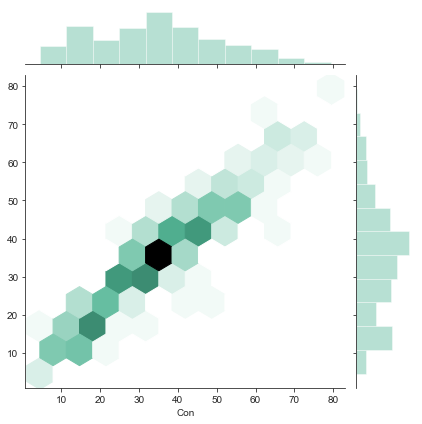

In [22]:
sb.jointplot(y_test, pred_rnf, kind="hex", color="#4CB391");